In [1]:
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt

In [2]:
G = pgv.AGraph()
nlist = "A B C D E".split()
a, b = "A A B", "B C D"
elist = zip(a.split(), b.split())

G.add_nodes_from(nlist)
G.add_edges_from(elist)
G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", len="1.0", width="2.0")

print(G.edge_attr)
# returns {'color': 'red', 'width': '', 'len': '2.0'}

# add new edge with custom length (all others have length=2.0):
G.add_edge("C", "E", len="6.0", color="blue", width="2.0")

In [3]:
G.draw("test.png", format='png', prog='neato')

In [4]:
edges = [(1, 2, 1), (2, 3, 2), (3, 4, 1), (1, 3, 2)]

G = nx.Graph()

for start, end, length in edges:
    # You can attach any attributes you want when adding the edge
    G.add_edge(start, end, len=length)


In [5]:
nx.spring_layout(G, weight='length')

{1: array([ 0.56887116, -0.43169896]),
 2: array([-0.08452119, -0.70910833]),
 3: array([-0.05978226,  0.14080729]),
 4: array([-0.42456772,  1.        ])}

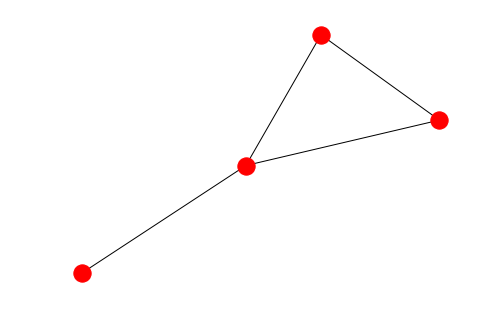

In [6]:
nx.draw(G, prog='neato')
plt.show()

In [7]:
G = pgv.AGraph()

In [8]:
G.add_node('a')
G.add_node('b')

In [9]:
G.add_edge('a', 'c')
G.add_edge('c','d')

In [10]:
G.get_edge('a','c').attr['len'] = '2.0'
G.get_edge('c','d').attr['len'] = '5.0'

In [11]:
G.draw("test.png", format='png', prog='neato')

In [31]:
G2 = pgv.AGraph()

G2.add_edge('a','c')
G2.add_edge('c','d')

G2.get_edge('a','c').attr['len'] = '2.0'
G2.get_edge('c','d').attr['len'] = '2.0'

In [29]:
G2.draw("test.png", prog='neato')

In [13]:
def select_k(spectrum, minimum_energy = 0.9):
    running_total = 0.0
    total = sum(spectrum)
    if total == 0.0:
        return len(spectrum)
    for i in range(len(spectrum)):
        running_total += spectrum[i]
        if running_total / total >= minimum_energy:
            return i + 1
    return len(spectrum)

In [33]:
lap1 = nx.spectrum.laplacian_spectrum(nx.drawing.nx_agraph.from_agraph(G))

In [34]:
lap2 = nx.spectrum.laplacian_spectrum(nx.drawing.nx_agraph.from_agraph(G2))

In [39]:
print(lap1)
print(lap2)

[  0.00000000e+00   3.92505363e-17   1.00000000e+00   3.00000000e+00]
[  3.92505363e-17   1.00000000e+00   3.00000000e+00]


In [40]:
k1 = select_k(lap1)
k2 = select_k(lap2)
k = min(k1, k2)

print(k1)
print(k2)

similarity = sum((lap1[:k] - lap1[:k])**2)

4
3


In [38]:
print(similarity)

0.0
